# Avanced Automation - Assignment 1

To be delivered until 2023-12-10 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

The RSS of the linear model will probably be larger than that of the cubic model, since the cubic model will overfit and capture the noise that the training data has. It will adapt better to the training data.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

Since the cubic model will overfit the noise present in the training data, it won't generalize the test data, which doesn't have the same noise as the training one, very well. This will result in the cubic model having a larger RSS than the linear model. The simplicity of the linear model ignores the unwanted noise.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

The cubic model is more flexible than the linear model. Therefore it will adapt better than the linear model. For this reason, the cubic model will probably have a smaller RSS than the linear model.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

For this situation, we do not have sufficient information to make any conclusions, as we do not have any information about the behaviour and complexity of the data.

**2.** Consider now the Palmer Archipelago penguin data. It consists of physical measurements of male and female adult penguins from three species that live in three different islands of the Palmer Archipelago in Antarctica.

**2.a)** Load the dataset `penguins_size.csv`.

In [ ]:
import pandas as pd
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**2.b)** Discard any row that has a missing value.

In [ ]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


**2.c)** How many penguins of each `species` and `sex` live in each `island`? Answer this question with `pandas`.

In [ ]:
count_species = df['species'].value_counts()
print(count_species)
count_sex = df['sex'].value_counts()
print(count_sex)

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64
MALE      168
FEMALE    165
Name: sex, dtype: int64


**2.d)** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

<ipython-input-5-f4ca510a344e>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pvals = df.corr(method=lambda x,y: pearsonr(x,y)[1])


<Axes: >

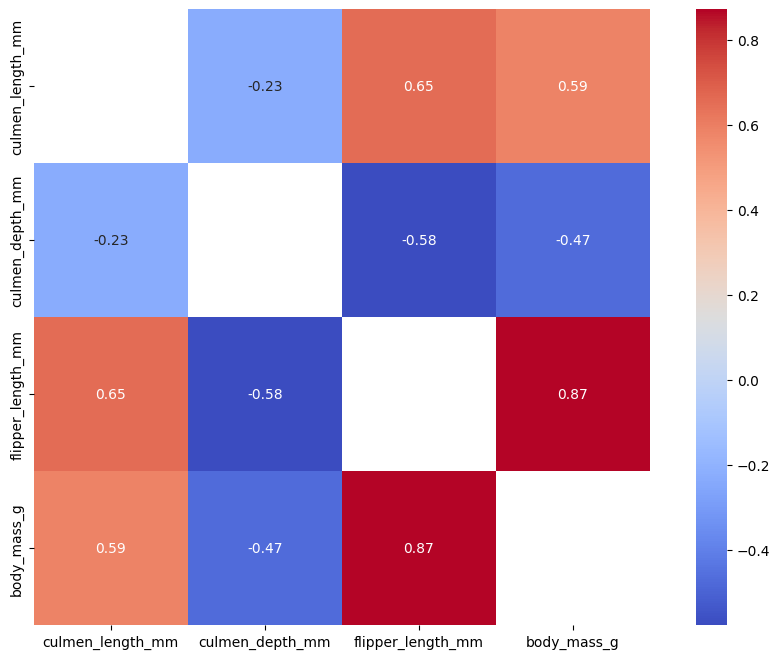

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Filters just the numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

## Calculate the pairwise correlations
df_corrs = df_numeric.corr()

## Calculate the p-values between the columns of the dataframe
pvals = df.corr(method=lambda x,y: pearsonr(x,y)[1])

## Create a mask, specifying the statistical significance
ptg = 0.1/100
mask = pvals > ptg

## Plot the graph
plt.subplots(figsize=(12, 8))
sns.heatmap(df_corrs, mask=mask, square=True, annot=True, cmap="coolwarm")

**2.e)** Perform a simple linear regression considering `body_mass_g` as the response and `flipper_length_mm` as the predictor. Print the obtained model and the $R^2$. Explain why this is a good choice of predictor.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
## array in a matricial shape, even if with a single column
X = df['flipper_length_mm'].values.reshape(-1, 1)
Y = df['body_mass_g'].values.reshape(-1, 1)

## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, Y)

## Print the interception and coefficient
print('body_mass_g = {:.4f} + {:.4f} * flipper_length_mm'.format(regr.intercept_[0], regr.coef_[0][0]))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
body_mass_g_pred = regr.predict(X)
r2_value = r2_score(Y, body_mass_g_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -5872.0927 + 50.1533 * flipper_length_mm
R^2: 0.7621


By analysing the obtained $R^2$ value, we can infer that, as it is relatively close to 1, there is a somewhat strong correlation between the two variables. Therefore, it is safe to assume that a penguin's flipper length influences its body mass.

**2.f)** Plot a scatter plot of the response and predictor, along with the regression line.

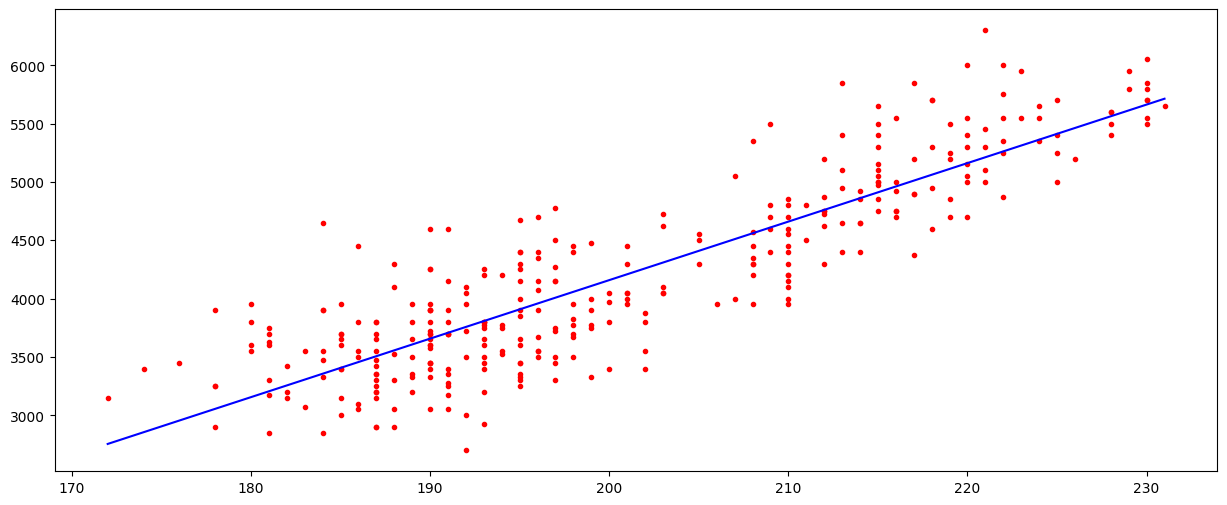

In [ ]:
import numpy as np

## Determine limits (min/max) of lstat and calculate the corresponding value of medv. Important: this can be done between
## only two points because this is a linear regression.
limits_flipper_length_mm = np.array([min(X), max(X)])
body_mass_g_vals = regr.intercept_[0] + regr.coef_[0][0]* limits_flipper_length_mm

## Plot the scatterplot and the regression line
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(df['flipper_length_mm'], df['body_mass_g'], '.r')
plt.plot(limits_flipper_length_mm,body_mass_g_vals, 'b-')
plt.show()

**2.g)** A baby penguin has a flipper length of around 50 mm. What is the predicted value of the body mass of a baby penguin? Comment on the prediction of the model.

In [ ]:
body_mass_g = regr.intercept_[0] + regr.coef_[0][0] * 50
print('{:.4f} g'.format(body_mass_g))

-3364.4294 g


The predicted value is absurd. While the Linear Regression is useful in providing a correlation between the penguins' body mass and their flipper length, it is based on the available data. Since 50 mm is an outlier when compared with the rest of the values, this method fails to predict the body mass of the penguin, returning an impossible result.

**2.h)** Perform a multiple linear regression considering `body_mass_g` as the response and using all numerical predictors. Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
## array in a matricial shape, even if with a single column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X_df = df[numeric_columns].drop(columns=['body_mass_g'])
X = X_df.values
y = df['body_mass_g'].values.reshape(-1, 1)

## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Format and print the interception and coefficientSs
values = list(regr.coef_[0])
values.insert(0, regr.intercept_[0])
names = list(X_df.columns.values)
names.insert(0,'intrcpt')
s = ['{} :: {:.4f}'.format(names[i].rjust(7), values[i]) for i in range(len(values))]
listToStr = '\n'.join([str(elem) for elem in s])
print(listToStr)

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
body_mass_g_pred = regr.predict(X)
r2_value = r2_score(y, body_mass_g_pred)
print('\n{} :: {:.4f}'.format('R^2'.rjust(7), r2_value))

intrcpt :: -6445.4760
culmen_length_mm :: 3.2929
culmen_depth_mm :: 17.8364
flipper_length_mm :: 50.7621

    R^2 :: 0.7639


In [ ]:
old_r2 = 0.7621
new_r2 = 0.7639
(new_r2-old_r2)/(1-old_r2)

0.007566204287515863

The introduction of the totality of the numerical variables in the linear regression model contributes to a slight growth of the $R^2$, which increases from 0.7621 to 0.7639, meaning that only 0.007566 of the variability in the single linear regression is explained by the addition of the other predictors. Therefore, we can conclude that the rest of the numerical predictors has minimal benefit in explaining the variance of the dependent variable.

**2.i)** Perform a multiple  linear regression considering `body_mass_g` as the response and using all predictors. Comment on the $R^2$ of this model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

def linear_regression_with_r2(df, body_mass_g):
    # Seleciona todas as colunas exceto a variável de resposta
    df = df.dropna()
    X_df = df.drop(columns=[body_mass_g])

    # Se há colunas não numéricas, realiza a codificação one-hot
    if not X_df.select_dtypes(include=['float64', 'int64']).empty:
        X_df = pd.get_dummies(X_df)

    # Assign predictor and response variables
    X = X_df.values
    y = df[body_mass_g].values.reshape(-1, 1)

    # Inicializa o modelo e ajusta os dados
    regr = LinearRegression()
    regr.fit(X, y)

    # Formata e imprime os coeficientes e interceptação
    values = list(regr.coef_[0])
    values.insert(0, regr.intercept_[0])
    names = list(X_df.columns.values)
    names.insert(0, 'intrcpt')
    s = ['{} :: {:.4f}'.format(names[i].rjust(7), values[i]) for i in range(len(values))]
    list_to_str = '\n'.join([str(elem) for elem in s])
    print(list_to_str)

    # Calcula e imprime o valor do R²
    response_pred = regr.predict(X)
    r2_value = r2_score(y, response_pred)
    print('\n{} :: {:.4f}'.format('R^2'.rjust(7), r2_value))

# Exemplo de uso
df = pd.read_csv("penguins_size.csv")
linear_regression_with_r2(df, 'body_mass_g')

intrcpt :: -1084.3208
culmen_length_mm :: 18.1893
culmen_depth_mm :: 67.5754
flipper_length_mm :: 16.2385
species_Adelie :: -242.4851
species_Chinstrap :: -502.7913
species_Gentoo :: 745.2764
island_Biscoe :: 20.3889
island_Dream :: 7.2858
island_Torgersen :: -27.6747
sex_FEMALE :: -193.6121
sex_MALE :: 193.6121

    R^2 :: 0.8752


In [ ]:
old_r2 = 0.7639
new_r2 = 0.8752
(new_r2-old_r2)/(1-old_r2)

0.4714104193138499

After the incorporation of all variables in the model, the value of $R^2$ increased considerably, reaching 0.8752, which is a good correlation. This result suggests that 0.47141 of the previous model's variability is explained by the non numerical variables.

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

Deciding which method is preferred for classifying new observations based solely on error rates is not always sufficient, as error rates can be influenced by various factors.
As, in logistic regression, the error related to the training data is smaller than that of the test data, we can assume that the model may be overfitting since it works better with data already used, than with data never seen before.
On the other hand, the average error related to de 1-nearest neighbors is lower than the logistic regression model, which indicates the model has a better overall performance in both datas.
Even though, 1-NN is more likely to have a lower bias but higher variance compared to logistic regression, based on the provided information, this model is the one preferred for classifying new observations.

**4.a)** Consider again the penguins dataset. However, the objective now is to predict the `sex` of the penguin based on the other variables. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("penguins_size.csv")

# Remove rows with any NaN values
df = df.dropna()

# Define features and target variable
features = ['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'sex'

# Separate features and target variable
X = df[features]
y = df[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

**4.b)** Perform LDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define transformations for numeric and categorical variables using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']),
        ('cat', OneHotEncoder(drop='first'), ['species', 'island'])])

# Creates and trains the LDA model
lda_model = LinearDiscriminantAnalysis()
X_train_processed = preprocessor.fit_transform(X_train)
lda_model.fit(X_train_processed, y_train)

# Transforms the test variables and makes the prediction
X_test_processed = preprocessor.transform(X_test)
y_pred = lda_model.predict(X_test_processed)

# Calculates the error
error = 1 - accuracy_score(y_test, y_pred)

# Prints the error
print('Error: {:.2f}'.format(error))

## Store the necessary variables
cols_to_store = [i for i in range(len(lda_model.classes_)) if lda_model.classes_[i] == 'MALE']
y_LDA_pred = lda_model.predict_proba(X_test_processed)[:, cols_to_store]
y_LDA_true = (y_test.copy() == 'MALE').copy()

Error: 0.05


**4.c)** Perform QDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Creates and trains the QDA model
qda_model = QuadraticDiscriminantAnalysis()
X_train_processed = preprocessor.fit_transform(X_train)
qda_model.fit(X_train_processed, y_train)

# Transforms the test variables and makes the prediction
X_test_processed = preprocessor.transform(X_test)
y_pred = qda_model.predict(X_test_processed)

# Calculates the error
error = 1 - accuracy_score(y_test, y_pred)

# Prints the error
print('Error: {:.2f}'.format(error))

## Store the necessary variables
cols_to_store = [i for i in range(len(qda_model.classes_)) if qda_model.classes_[i] == 'MALE']
y_QDA_pred = qda_model.predict_proba(X_test_processed)[:, cols_to_store]
y_QDA_true = (y_test.copy() == 'MALE').copy()

Error: 0.08


**4.d)** Perform logistic regression on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creates and trains the logistic regression model
logreg_model = LogisticRegression()
X_train_processed = preprocessor.fit_transform(X_train)
logreg_model.fit(X_train_processed, y_train)

# Transforms the test variables and makes the prediction
X_test_processed = preprocessor.transform(X_test)
y_pred = logreg_model.predict(X_test_processed)

# Calculates the error
error = 1 - accuracy_score(y_test, y_pred)

# Prints the error
print('Error: {:.2f}'.format(error))

## Store the necessary variables
cols_to_store = [i for i in range(len(logreg_model.classes_)) if logreg_model.classes_[i] == 'MALE']
y_logistic_pred = logreg_model.predict_proba(X_test_processed)[:, cols_to_store]
y_logistic_true = (y_test.copy() == 'MALE').copy()

Error: 0.07


**4.e)** Perform naive Bayes on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Creates and trains the naive Bayes model
nb_model = GaussianNB()
X_train_processed = preprocessor.fit_transform(X_train)
nb_model.fit(X_train_processed, y_train)

# Transforms the test variables and makes the prediction
X_test_processed = preprocessor.transform(X_test)
y_pred = nb_model.predict(X_test_processed)

# Calculates the error
error = 1 - accuracy_score(y_test, y_pred)

# Prints the error
print('Error: {:.2f}'.format(error))

## Store the necessary variables
cols_to_store = [i for i in range(len(nb_model.classes_)) if nb_model.classes_[i] == 'MALE']
y_GNB_pred = nb_model.predict_proba(X_test_processed)[:, cols_to_store]
y_GNB_true = (y_test.copy() == 'MALE').copy()

Error: 0.17


**4.f)** Perform KNN on the training data, with several values of K, in order to predict `sex`. What test errors are obtained? Which value of K seems to perform the best on this data set?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, print_error=0):

    # Creates and trains the naive Bayes model
    X_train_processed = preprocessor.fit_transform(X_train)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_processed, y_train)

    # Transforms the test variables and makes the prediction
    X_test_processed = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_processed)

    # Calculates the error
    error = 1 - accuracy_score(y_pred, y_test)

    # Prints the error if print_error=1
    if print_error == 1:
      print('Error ({:d} neighbors): {:.2f}'.format(n_neighbors, error))

    return model, error

## Store the necessary variables for K neighbors
K = 50
errors = []
y_KNN_preds = []
y_KNN_trues = []
for j in range(1,K+1):
  model, error_j = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=j, print_error=1)
  cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'MALE']
  y_KNN_pred_j = model.predict_proba(X_test_processed)[:,cols_to_store]
  y_KNN_true_j = (y_test.copy() == 'MALE').copy()
  y_KNN_preds.append(y_KNN_pred_j)
  y_KNN_trues.append(y_KNN_true_j)
  errors.append(error_j)
  K_best = min(range(len(errors)), key=lambda i: errors[i]) + 1
print('Best K: {:d}\nError(K={:d}): {:.2f}'.format(K_best, K_best, errors[K_best-1]))

Error (1 neighbors): 0.15
Error (2 neighbors): 0.14
Error (3 neighbors): 0.09
Error (4 neighbors): 0.13
Error (5 neighbors): 0.11
Error (6 neighbors): 0.10
Error (7 neighbors): 0.10
Error (8 neighbors): 0.09
Error (9 neighbors): 0.09
Error (10 neighbors): 0.06
Error (11 neighbors): 0.06
Error (12 neighbors): 0.06
Error (13 neighbors): 0.07
Error (14 neighbors): 0.09
Error (15 neighbors): 0.06
Error (16 neighbors): 0.06
Error (17 neighbors): 0.05
Error (18 neighbors): 0.06
Error (19 neighbors): 0.04
Error (20 neighbors): 0.05
Error (21 neighbors): 0.03
Error (22 neighbors): 0.04
Error (23 neighbors): 0.04
Error (24 neighbors): 0.03
Error (25 neighbors): 0.05
Error (26 neighbors): 0.04
Error (27 neighbors): 0.06
Error (28 neighbors): 0.05
Error (29 neighbors): 0.08
Error (30 neighbors): 0.05
Error (31 neighbors): 0.06
Error (32 neighbors): 0.05
Error (33 neighbors): 0.07
Error (34 neighbors): 0.06
Error (35 neighbors): 0.06
Error (36 neighbors): 0.06
Error (37 neighbors): 0.06
Error (38 

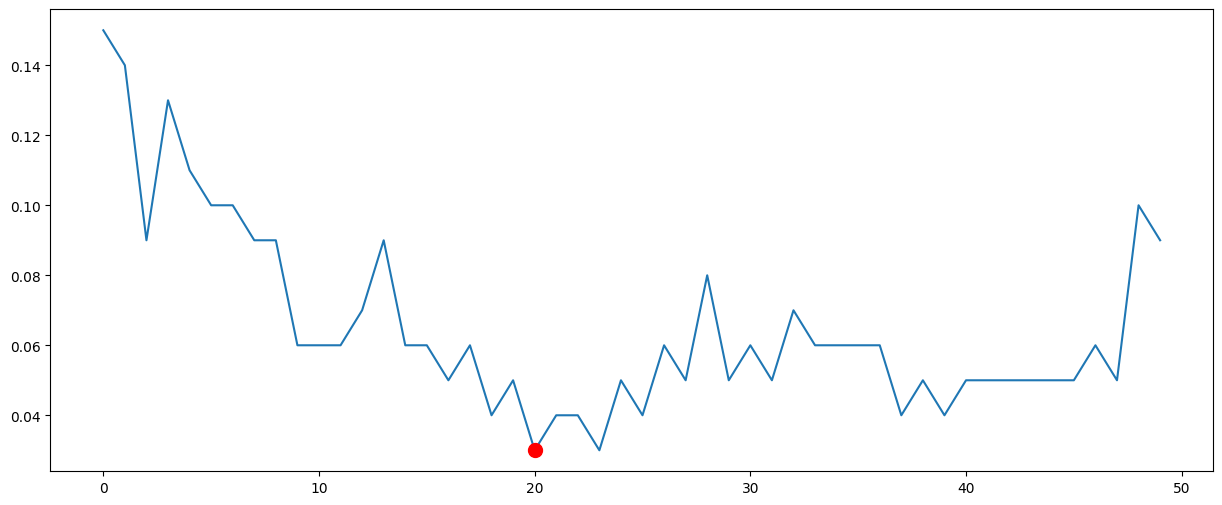

In [ ]:
import matplotlib.pyplot as plt

# Creates a basic line plot and displays the plot
plt.plot(errors)
plt.plot(K_best-1, errors[K_best-1], marker='o', markersize=10, color='red')
plt.show()

**4.g)** Plot the ROC curve and calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

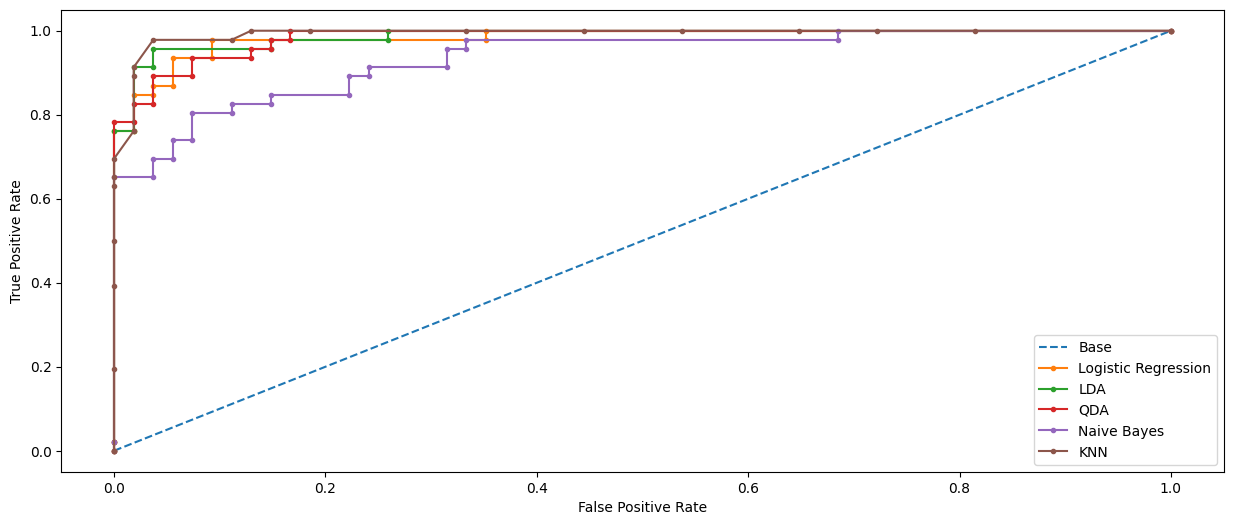

                      AUC
Logistic Regression: 0.982
                LDA: 0.987
                QDA: 0.984
        Naive Bayes: 0.935
                KNN: 0.992


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_trues[K_best-1], y_KNN_preds[K_best-1])

# Plot the ROC curve for the model
plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Print scores of Area under curve (AUC)
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_GNB_true, y_GNB_pred)))
print('{}: {:.3f}'.format('KNN'.rjust(19), roc_auc_score(y_KNN_trues[K_best-1], y_KNN_preds[K_best-1])))

KNN achieved the highest AUC (0.992), showcasing the strongest class separation. LDA, Logistic Regression, and QDA followed closely with AUC values around 0.98, indicating competitive performance. Naive Bayes demonstrated comparatively weaker discriminative ability, albeit acceptable, with an AUC of 0.935. Overall, all the methods demonstrated satisfactory performances for the problem in question.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how k-fold cross-validation is implemented.

Firstly, you select the number of sets the dataset should be divided into (K). Afterwards, the dataset is divided into K equal folds. The wanted machine learning model is then trained and assessed K times, with each time using a different fold as the validation set. To estimate the model's generalization performance, performance metrics from each fold are averaged.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

1.
Advantages:


*   K-Fold reduces the possibility of the validation set comprising of datapoints that do not represent the overall data well because it does multiple splits, which is not the case with the validation set approach, which relies heavily on one split
*   K-Fold helps the model to generalize better as it's trained and tested on different subsets of the data rather than just one, like the validation set approach does, providing a more comprehensive evaluation of the model's performance

Disadvantages:

* As K-Fold requires training and evaluation of the model K times, it will be more computationally expensive than the one split that the validation set approach does. This is especially when the dataset it larger
* The training time of K-Fold is much higher than the one of validation set approaches, this is can be seen especially when the model is more complex

2.
Advantages:

* K-Folds is much more computationally efficient compared to LOOCV as LOOCV does as many splits as there are datapoints, making it basically unusable in really big datasets

* K-Folds is less sensitive to outliers, as each fold represents a smaller subset of data than the one of LOOCV, which uses almost all data in each training iteration

Disadvantages:

* K-Fold has higher bias compared to LOOCV as the model is trained with less data

* K-Fold is less suitable for smaller datasets where the use of available data for training should be maximized. LOOCV excels at this


## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

Advantages:


*   Through virtual evironments you can isolate project specific dependencies, meaning that libraries and packages needed in one project do not interfere with the same packages in another project. I.E if you need in one project Numpy 3.1.2 and in another project because of dependencies you need Numpy 3.2.1, the're is no need to uninstall and re install numpy with different version
*   You can also isolate the Python intrepeter per project similiar to different libraries and packages
* Makes documentation of requirements easier as virtual enviroments creates a requirements.txt file which includes dependencies and libraries of the environment

Disadvantages:
* There is a learning curve in the beginning, especially when not using anaconda navigator and being forced to use the command line for the first time

* Having multiple virtual environments consumes storage space from your computer



**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

Better to use Jupyter Notebooks:


*   When dealing with important code, that can in no circumstance be subject to cyber security breaches like sensitive goverment data
*   When internet is not available for example in planes
* When needing specific libraries or dependencies that might not be available on the default version of Colab environment
* When you're out of google drive memory


Better to use Google Colab notebooks:

* When doing computionally heavy coding such as Machine Learning or especially Deep Learning, which requires GPU's and/or TPU's
* When doing school projects where online collaboration is preferred, as multiple users can work on the same notebook simultaniously
* When running out of local memory on computer
* When having problems with installing different libraries
